<a href="https://colab.research.google.com/github/rohailkhan/Keras-Deeplearning-Francos/blob/master/3_MNIST_P_33_%26_IMDB_data_Page_77.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.model_selection as model_selection

import tensorflow
from tensorflow import keras 

from tensorflow.keras import layers
from tensorflow.keras import models

from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print([train_images.shape, train_labels.shape,test_images.shape, test_labels.shape])

    8192/11490434 [..............................] - ETA: 0s

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step
[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]


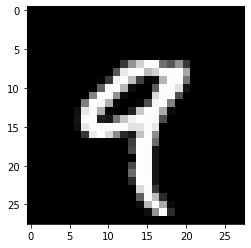

In [0]:
digit = train_images[4]
plt.imshow(digit,cmap='gray',vmin=0,vmax=255)
plt.show()


In [0]:
#reshape train data
train_images = train_images.reshape((60000, 28 * 28))
#train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
#test_images = test_images.astype('float32') / 255
print([train_images.shape, train_labels.shape,test_images.shape, test_labels.shape])

[(60000, 784), (60000,), (10000, 784), (10000,)]


# We have 10 classes,so the target should have 10 labels. We acheive it by one hot encoding

In [0]:
from tensorflow.keras.utils import to_categorical
NB_CLASSES = 10 # number of outputs = number of digits
#One-hot representation of the labels.
train_labels = to_categorical(train_labels, NB_CLASSES)
test_labels = to_categorical(test_labels, NB_CLASSES)
print([train_images.shape, train_labels.shape,test_images.shape, test_labels.shape])

[(60000, 28, 28), (60000, 10), (10000, 28, 28), (10000, 10)]


In [0]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [0]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [0]:
historynew=network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 6.1494 - accuracy: 0.8977
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.7253 - accuracy: 0.9532
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4994 - accuracy: 0.9656
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.4109 - accuracy: 0.9720
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.3763 - accuracy: 0.9760


In [0]:
for i in historynew.history.keys():
  print(i)

loss
accuracy


In [0]:
print("loss= " + str(historynew.history['loss']))
print("accuracy= " + str(historynew.history['accuracy']))

loss= [6.149372100830078, 0.7253403067588806, 0.49940988421440125, 0.4109308421611786, 0.3763054609298706]
accuracy= [0.8976666927337646, 0.9532166719436646, 0.9656333327293396, 0.9719666838645935, 0.9760000109672546]


## Training with validation data

In [0]:
historynew2=network.fit(train_images,train_labels,epochs=5,batch_size=128,validation_split=0.3)

Epoch 1/5
329/329 [==============================] - 4s 11ms/step - loss: 0.2867 - accuracy: 0.9819 - val_loss: 0.2689 - val_accuracy: 0.9832
Epoch 2/5
329/329 [==============================] - 4s 12ms/step - loss: 0.2537 - accuracy: 0.9845 - val_loss: 0.4394 - val_accuracy: 0.9782
Epoch 3/5
329/329 [==============================] - 4s 11ms/step - loss: 0.2148 - accuracy: 0.9870 - val_loss: 0.3929 - val_accuracy: 0.9813
Epoch 4/5
329/329 [==============================] - 4s 11ms/step - loss: 0.2333 - accuracy: 0.9870 - val_loss: 0.4481 - val_accuracy: 0.9817
Epoch 5/5
329/329 [==============================] - 4s 11ms/step - loss: 0.2055 - accuracy: 0.9883 - val_loss: 0.3783 - val_accuracy: 0.9836


In [0]:
historynew2_dict=historynew2.history
for i in historynew2_dict.keys():
  print(i)

loss
accuracy
val_loss
val_accuracy


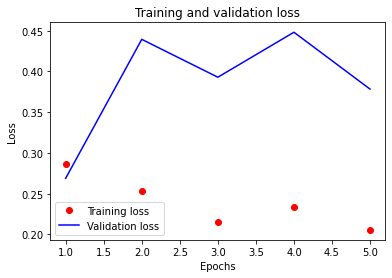

In [0]:
loss_values=historynew2_dict['loss']
val_loss_values=historynew2_dict['val_loss']
epochs = range(1, len(historynew2_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'bo',color='red', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


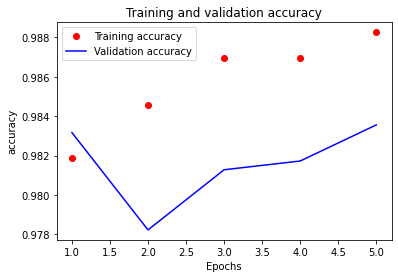

In [0]:
accuracy_values=historynew2_dict['accuracy']
val_accuracy_values=historynew2_dict['val_accuracy']
epochs = range(1, len(historynew2_dict['accuracy']) + 1)
plt.plot(epochs, accuracy_values, 'bo',color='red', label='Training accuracy')
plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

https://www.manning.com/books/deep-learning-with-python  What is loss funcion...page 60

# IMDB example

In [0]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
print(train_data.shape,train_labels.shape,test_data.shape,test_labels.shape)

(25000,) (25000,) (25000,) (25000,)


In [0]:
max([max(k) for k in train_data])

9999

In [0]:
max([max(p) for p in test_data])

9999

In [0]:
import numpy as np
np.zeros([1,2])

array([[0., 0.]])

In [0]:
def one_hot(sequence,dimension=10000):
  #array of allll zeros
  result=np.zeros(shape=(len(sequence),dimension))
  for i,sequence in enumerate(sequence):
    result[i,sequence]=1
  return result

In [0]:
x_train=one_hot(train_data)
x_test=one_hot(test_data)

In [0]:
print(train_labels.shape)
print(train_labels[0:1])
print(train_labels[0:2])
print(train_labels[0:5])

(25000,)
[1]
[1 0]
[1 0 0 1 0]


convert labels to float

In [0]:
# vectroise labels
y_train=np.asanyarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train.shape)
print(y_train[0:1])
print(y_train[0:2])
print(y_train[0:5])

(25000,)
[1.]
[1. 0.]
[1. 0. 0. 1. 0.]


In [0]:
train_data.shape

(25000,)

In [0]:
x_train1[1:2]

array([[0., 1., 1., ..., 0., 0., 0.]])

In [0]:
train_data.shape

(25000,)

In [0]:
type(train_data)

numpy.ndarray

In [0]:
from tensorflow.keras.utils import to_categorical

In [0]:
train_data[1:2]

array([list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95])],
      dtype=object)

In [0]:
train_labels[1:4]

array([0, 0, 1])

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
from keras import optimizers
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
# using losses  with hyperparameters
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
#using metrics with hyperparameters
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.01),loss='binary_crossentropy',metrics=[metrics.binary_accuracy])

In [0]:
# validating our aproach by splitting data in train and test
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])

In [0]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0334 - acc: 0.9911 - val_loss: 0.6911 - val_acc: 0.8688
Epoch 2/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.0209 - acc: 0.9940 - val_loss: 0.7093 - val_acc: 0.8701
Epoch 3/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.0022 - acc: 0.9999 - val_loss: 0.7408 - val_acc: 0.8704
Epoch 4/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.0015 - acc: 0.9999 - val_loss: 0.7954 - val_acc: 0.8708
Epoch 5/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.0179 - acc: 0.9949 - val_loss: 0.8669 - val_acc: 0.8688
Epoch 6/20
15000/15000 [==============================] - 2s 110us/step - loss: 6.5953e-04 - acc: 0.9999 - val_loss: 0.8778 - val_acc: 0.8688
Epoch 7/20
15000/15000 [==============================] - 2s 109us/step - loss: 4.9970e-04 - acc: 0.9999 - val_loss: 0

In [0]:
history_dict=history.history
for i in history_dict.keys():
  print(i)

val_loss
val_acc
loss
acc


In [0]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

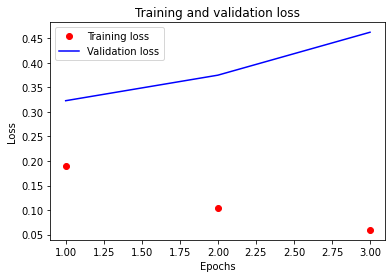

In [0]:
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs = range(1, len(history_dict['loss']) + 1)
plt.plot(epochs, loss_values, 'bo',color='red', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

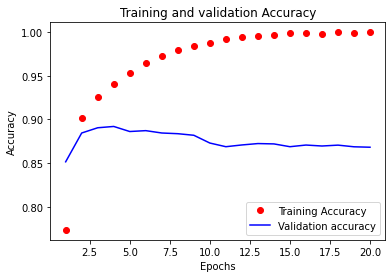

In [0]:
acc_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, acc_values, 'bo',color='red', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Listing 3.11 Retraining a model from scratch
page 76

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results = model.evaluate(x_test, y_test)
The final results are as follows:
>>> results
[0.2929924130630493, 0.88327999999999995]
This fairly naive approach achieves an accuracy of 88%. With state-of-the-art
approaches, you should be able to get close to 95%.

## 3.4.5 Using a trained network to generate predictions on new data

In [0]:
model.predict(x_test)

## 3.5.8 Further experiments
 Try using larger or smaller layers: 32 units, 128 units, and so on.
 You used two hidden layers. Now try using a single hidden layer, or three hidden
layers.

In [0]:
from keras.optimizers import Adam

In [0]:
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
early_stopping_monitor = EarlyStopping(patience=2)

In [0]:
from keras.callbacks import ModelCheckpoint
from keras.initializers import glorot_uniform

In [0]:
check_point=ModelCheckpoint('best_imdb.hdf5',save_best_only=True)

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu',
                       kernel_initializer=glorot_uniform(seed=66), input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu',
                       kernel_initializer=glorot_uniform(seed=66)))
model.add(layers.Dense(16, activation='relu',
                       kernel_initializer=glorot_uniform(seed=66)))
model.add(layers.Dense(1, activation='sigmoid',
                       kernel_initializer=glorot_uniform(seed=66)))

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(partial_x_train,partial_y_train,epochs=200,batch_size=128,validation_data=(x_val, y_val),callbacks=[check_point,early_stopping_monitor],
                    verbose=0)

In [0]:
history_dict=history.history

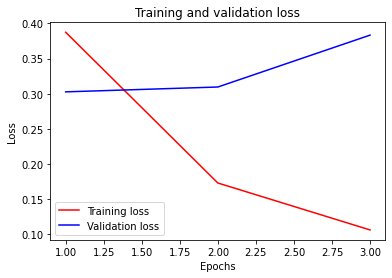

In [0]:
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs = range(1, len(history_dict['loss']) + 1)
plt.plot(epochs, loss_values, color='red', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 77us/step


[0.42637929663181307, 0.858680009841919]

In [0]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu',
                       kernel_initializer=glorot_uniform(seed=66), input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu',
                       kernel_initializer=glorot_uniform(seed=66)))
model.add(layers.Dense(16, activation='relu',
                       kernel_initializer=glorot_uniform(seed=66)))
model.add(layers.Dense(1, activation='sigmoid',
                       kernel_initializer=glorot_uniform(seed=66)))
model.load_weights('best_imdb.hdf5')

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [0]:
history = model.fit(partial_x_train,partial_y_train,epochs=200,batch_size=128,validation_data=(x_val, y_val),callbacks=[check_point,early_stopping_monitor],
                    verbose=0)

In [0]:
history_dict=history.history

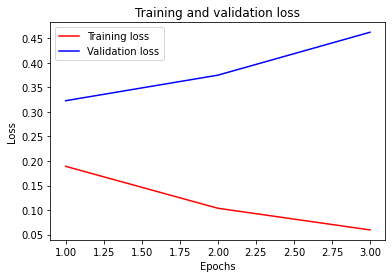

In [0]:
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs = range(1, len(history_dict['loss']) + 1)
plt.plot(epochs, loss_values, color='red', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
model.evaluate(x_test,y_test)

25000/25000 [==============================] - 2s 68us/step


[0.501369418258667, 0.858240008354187]

In [0]:
import os
os.listdir('/content')

In [0]:
os.getcwd()

'/content'

In [0]:
import os
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


In [0]:
# Put all files into a single dataframe
/content/001a02.txt
list_dir = [i for i in os.listdir('/content')]
final_df = pd.DataFrame(columns=['ID','Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index','AGE'])
interim_df = pd.DataFrame(columns=['ID','Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index','AGE'])
age_list=list()
for d in list_dir:
    interim_df.at[0,  ['Facial Index','Mandibular Index','Intercantal Index','Orbital Width Index','Eye Fissure Index','Vermilion Height Index','Mouth Face Width Index']] = pd.read_csv('datafiles/'+d, sep=" ", header=None).values[0][:7]
    interim_df['AGE'] = int(d[4:].replace('.txt','').replace('a','').replace('b',''))
    interim_df['ID'] = int(d[:3])
    final_df = pd.concat([final_df,interim_df])
    
# sort values by age of same person
final_df = final_df.sort_values(['ID','AGE'],ascending=True)

FileNotFoundError: ignored